In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data for all scores into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Score': 'Education Score'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Score': 'Energy Score'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Score': 'Governance Score'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Score': 'Health Score'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Score': 'Nutrition Score'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Score': 'Sanitation Score'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Score': 'Water Score'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Score']].merge(
    energy[['Name', 'Energy Score']], on='Name').merge(
    governance[['Name', 'Governance Score']], on='Name').merge(
    health[['Name', 'Health Score']], on='Name').merge(
    nutrition[['Name', 'Nutrition Score']], on='Name').merge(
    sanitation[['Name', 'Sanitation Score']], on='Name').merge(
    water[['Name', 'Water Score']], on='Name')

# Step 3: Use individual scores as features
X = data[['Energy Score', 'Governance Score', 'Health Score', 'Nutrition Score', 
          'Sanitation Score', 'Water Score']]  # Features
y = data['Education Score']                   # Target

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Display the coefficients for each factor
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error: 155.27827982537121
R-squared: 0.011240145558244596
            Feature  Coefficient
0      Energy Score     0.103304
1  Governance Score     0.053763
2      Health Score     0.399741
3   Nutrition Score    -0.076696
4  Sanitation Score     0.081372
5       Water Score    -0.029543


In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model with scaled features
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate again
y_pred_scaled = model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Scaled Mean Squared Error: {mse_scaled}")
print(f"Scaled R-squared: {r2_scaled}")


Scaled Mean Squared Error: 155.27827982537102
Scaled R-squared: 0.011240145558245929


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Mean Squared Error: 149.1544576423078
Random Forest R-squared: 0.050234585328974624


In [7]:
# Calculate the correlation matrix
corr_matrix = X_train.corr()
print(corr_matrix)


                  Energy Score  Governance Score  Health Score  \
Energy Score          1.000000          0.215603      0.063114   
Governance Score      0.215603          1.000000      0.049448   
Health Score          0.063114          0.049448      1.000000   
Nutrition Score      -0.238760         -0.075722     -0.083265   
Sanitation Score      0.389810          0.103441     -0.002107   
Water Score           0.635889          0.219066      0.083148   

                  Nutrition Score  Sanitation Score  Water Score  
Energy Score            -0.238760          0.389810     0.635889  
Governance Score        -0.075722          0.103441     0.219066  
Health Score            -0.083265         -0.002107     0.083148  
Nutrition Score          1.000000         -0.178831    -0.239918  
Sanitation Score        -0.178831          1.000000     0.495384  
Water Score             -0.239918          0.495384     1.000000  


In [8]:
import pandas as pd

# Combine the X_train data with the y_train (Education Score) into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Calculate the correlation matrix including the Education Score
corr_matrix = train_data.corr()

# Print the correlation between features and Education Score
print(corr_matrix['Education Score'].sort_values(ascending=False))


Education Score     1.000000
Energy Score        0.269855
Health Score        0.217981
Sanitation Score    0.213143
Water Score         0.194990
Governance Score    0.111793
Nutrition Score    -0.151305
Name: Education Score, dtype: float64


# Rank

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the data for all rankings into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Ranking': 'Education Rank'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Ranking': 'Energy Rank'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Ranking': 'Governance Rank'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Ranking': 'Health Rank'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Ranking': 'Nutrition Rank'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Ranking': 'Sanitation Rank'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Ranking': 'Water Rank'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Rank']].merge(
    energy[['Name', 'Energy Rank']], on='Name').merge(
    governance[['Name', 'Governance Rank']], on='Name').merge(
    health[['Name', 'Health Rank']], on='Name').merge(
    nutrition[['Name', 'Nutrition Rank']], on='Name').merge(
    sanitation[['Name', 'Sanitation Rank']], on='Name').merge(
    water[['Name', 'Water Rank']], on='Name')

# Step 3: Use individual ranks as features
X = data[['Energy Rank', 'Governance Rank', 'Health Rank', 'Nutrition Rank', 
          'Sanitation Rank', 'Water Rank']]  # Features
y = data['Education Rank']                   # Target

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 8: Display the coefficients for each factor
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 5848.834060114619
R-squared: 0.10212322545506825
           Feature  Coefficient
0      Energy Rank     0.136837
1  Governance Rank     0.098518
2      Health Rank     0.161642
3   Nutrition Rank    -0.017141
4  Sanitation Rank     0.164789
5       Water Rank     0.014716


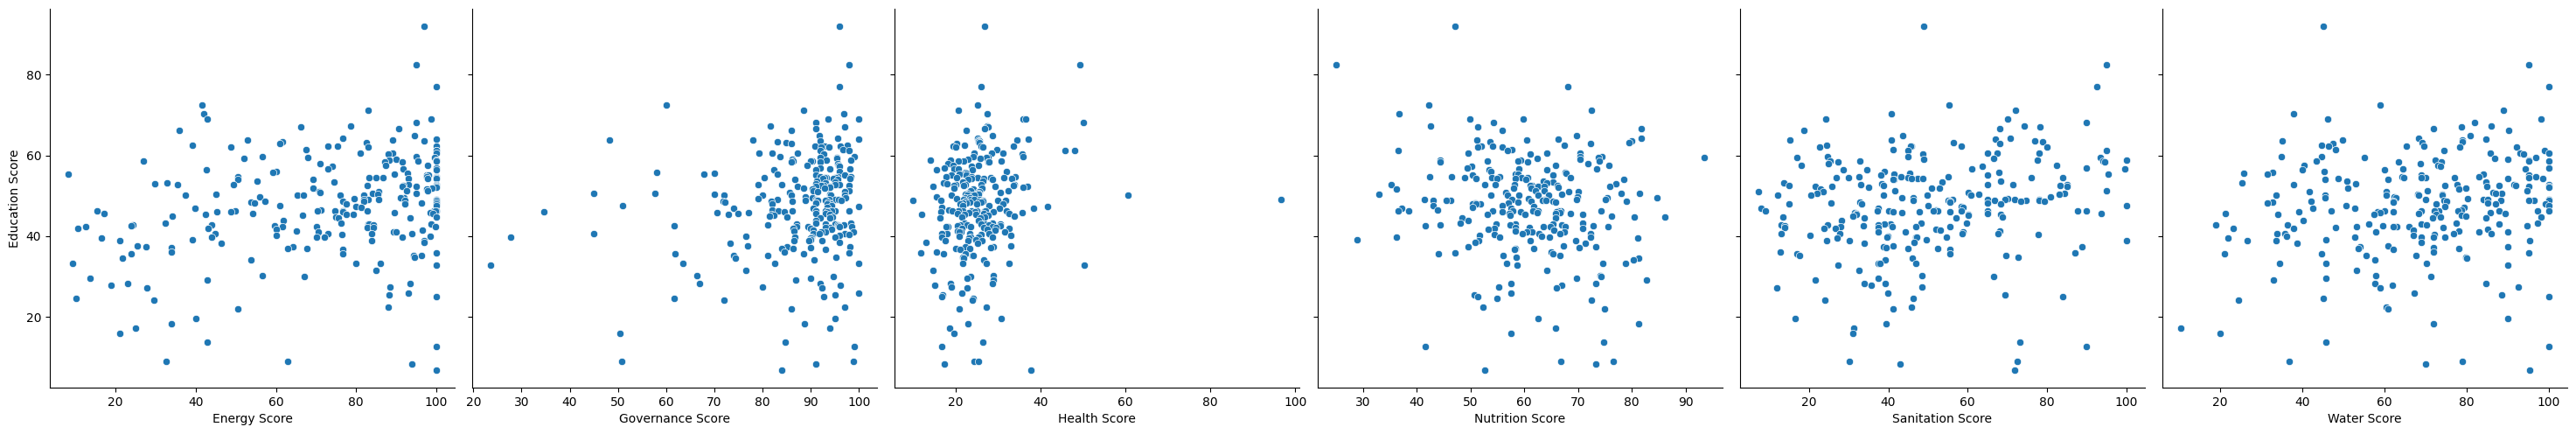

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data for all scores into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Score': 'Education Score'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Score': 'Energy Score'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Score': 'Governance Score'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Score': 'Health Score'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Score': 'Nutrition Score'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Score': 'Sanitation Score'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Score': 'Water Score'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Score']].merge(
    energy[['Name', 'Energy Score']], on='Name').merge(
    governance[['Name', 'Governance Score']], on='Name').merge(
    health[['Name', 'Health Score']], on='Name').merge(
    nutrition[['Name', 'Nutrition Score']], on='Name').merge(
    sanitation[['Name', 'Sanitation Score']], on='Name').merge(
    water[['Name', 'Water Score']], on='Name')

# Step 3: Create pairwise scatter plots for each score against Education Score
sns.pairplot(data, x_vars=['Energy Score', 'Governance Score', 'Health Score', 'Nutrition Score', 
                           'Sanitation Score', 'Water Score'], y_vars='Education Score', height=5, aspect=1)

# Show the plot
plt.show()


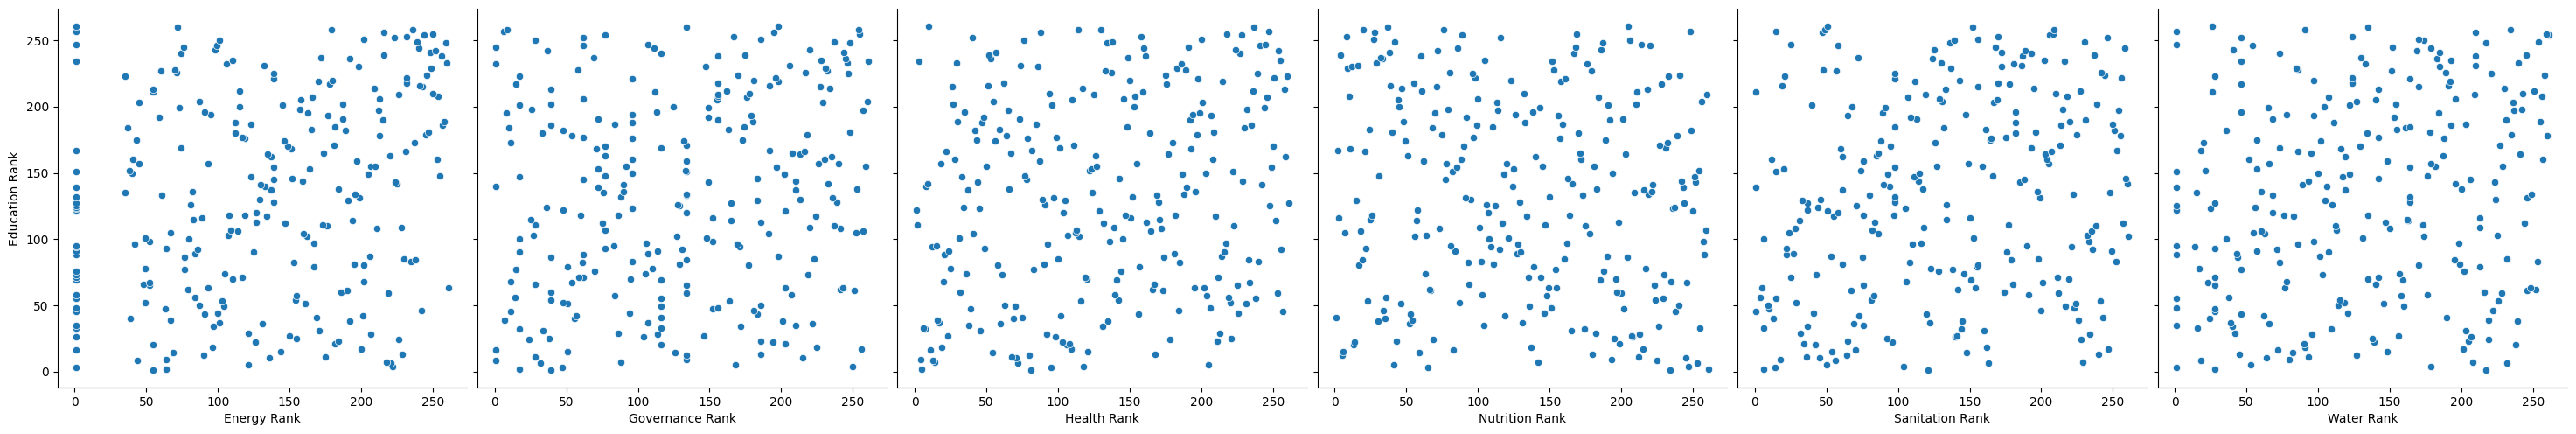

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data for all rankings into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Ranking': 'Education Rank'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Ranking': 'Energy Rank'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Ranking': 'Governance Rank'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Ranking': 'Health Rank'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Ranking': 'Nutrition Rank'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Ranking': 'Sanitation Rank'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Ranking': 'Water Rank'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Rank']].merge(
    energy[['Name', 'Energy Rank']], on='Name').merge(
    governance[['Name', 'Governance Rank']], on='Name').merge(
    health[['Name', 'Health Rank']], on='Name').merge(
    nutrition[['Name', 'Nutrition Rank']], on='Name').merge(
    sanitation[['Name', 'Sanitation Rank']], on='Name').merge(
    water[['Name', 'Water Rank']], on='Name')

# Step 3: Create pairwise scatter plots for each rank against Education Rank
sns.pairplot(data, x_vars=['Energy Rank', 'Governance Rank', 'Health Rank', 'Nutrition Rank', 
                           'Sanitation Rank', 'Water Rank'], y_vars='Education Rank', height=5, aspect=1)

# Show the plot
plt.show()


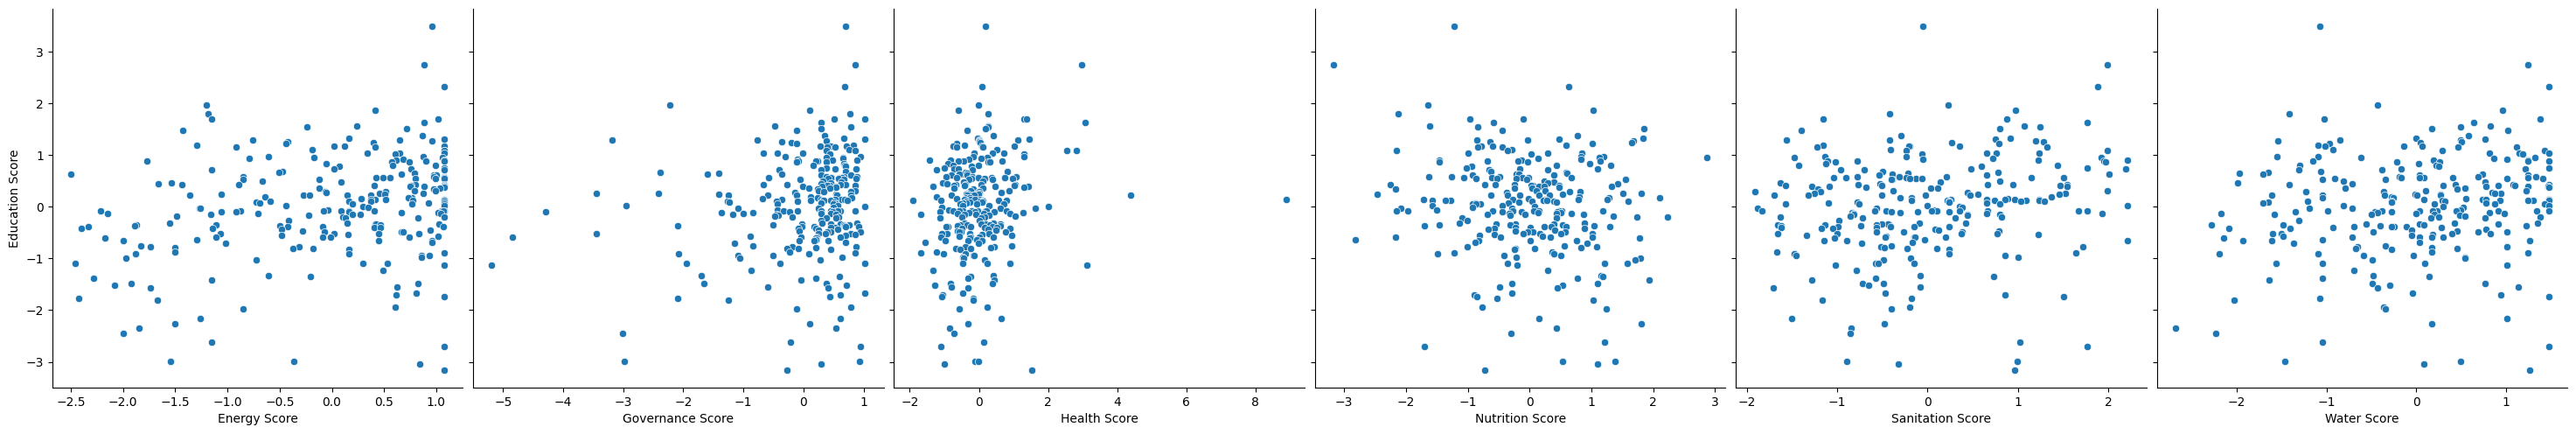

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data for all scores into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Score': 'Education Score'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Score': 'Energy Score'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Score': 'Governance Score'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Score': 'Health Score'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Score': 'Nutrition Score'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Score': 'Sanitation Score'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Score': 'Water Score'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Score']].merge(
    energy[['Name', 'Energy Score']], on='Name').merge(
    governance[['Name', 'Governance Score']], on='Name').merge(
    health[['Name', 'Health Score']], on='Name').merge(
    nutrition[['Name', 'Nutrition Score']], on='Name').merge(
    sanitation[['Name', 'Sanitation Score']], on='Name').merge(
    water[['Name', 'Water Score']], on='Name')

# Step 3: Normalize the score columns using StandardScaler
scaler = StandardScaler()

# Select the columns to normalize
columns_to_normalize = ['Education Score', 'Energy Score', 'Governance Score', 'Health Score', 
                        'Nutrition Score', 'Sanitation Score', 'Water Score']

# Apply the scaler to the selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Step 4: Create pairwise scatter plots for each normalized score against Education Score
sns.pairplot(data, x_vars=['Energy Score', 'Governance Score', 'Health Score', 'Nutrition Score', 
                           'Sanitation Score', 'Water Score'], y_vars='Education Score', height=5, aspect=1)

# Show the plot
plt.show()


/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/tljh/user/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable ha

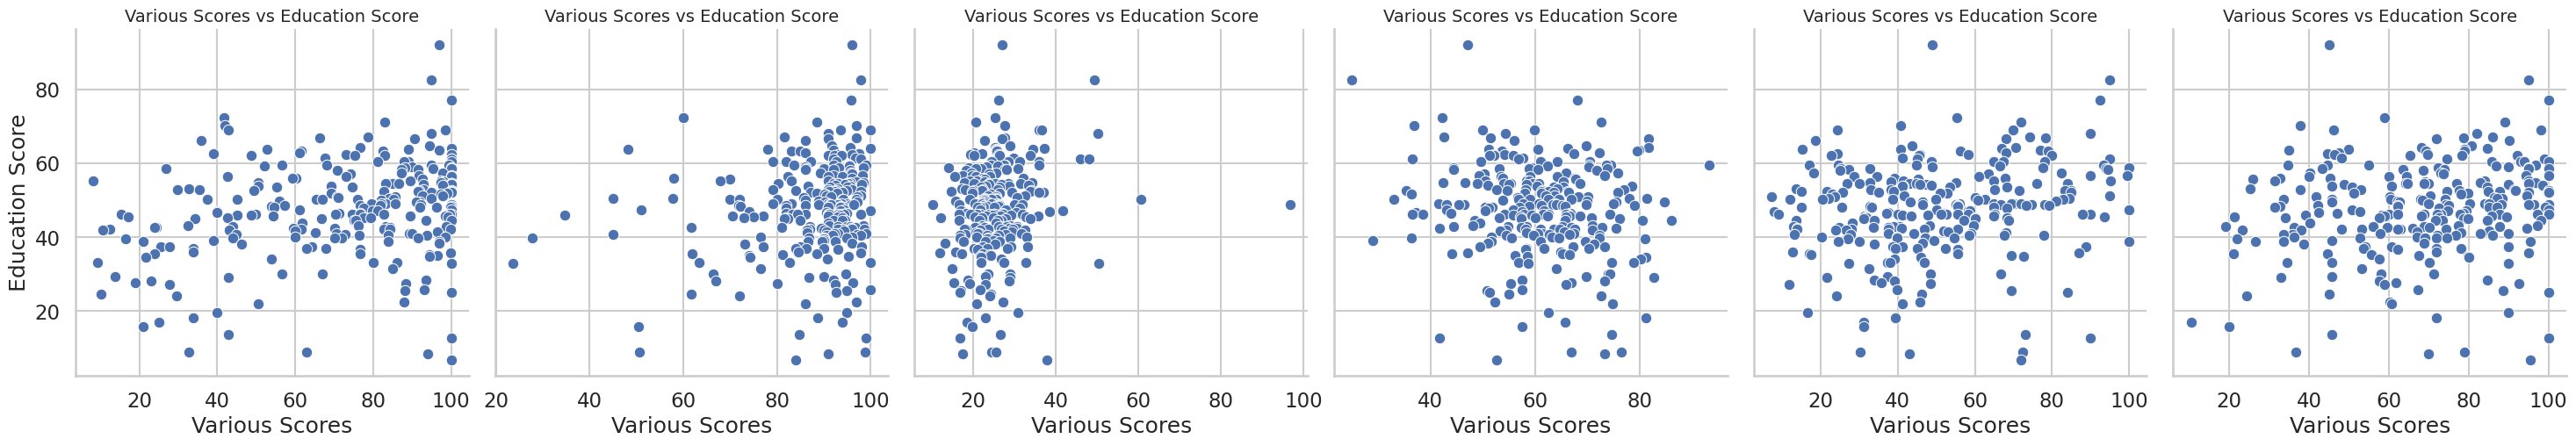

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the data for all scores into separate DataFrames
education = pd.read_csv('shared_documents/2022/Education_scores.csv').rename(columns={'2022 Score': 'Education Score'})
energy = pd.read_csv('shared_documents/2022/Energy_scores.csv').rename(columns={'2022 Score': 'Energy Score'})
governance = pd.read_csv('shared_documents/2022/Governance_scores.csv').rename(columns={'2022 Score': 'Governance Score'})
health = pd.read_csv('shared_documents/2022/Health_scores.csv').rename(columns={'2022 Score': 'Health Score'})
nutrition = pd.read_csv('shared_documents/2022/Nutrition_scores.csv').rename(columns={'2022 Score': 'Nutrition Score'})
sanitation = pd.read_csv('shared_documents/2022/Sanitation_scores.csv').rename(columns={'2022 Score': 'Sanitation Score'})
water = pd.read_csv('shared_documents/2022/Water_scores.csv').rename(columns={'2022 Score': 'Water Score'})

# Step 2: Merge the data on common columns (e.g., 'District Name', 'Region')
data = education[['Name', 'Region', 'Education Score']].merge(
    energy[['Name', 'Energy Score']], on='Name').merge(
    governance[['Name', 'Governance Score']], on='Name').merge(
    health[['Name', 'Health Score']], on='Name').merge(
    nutrition[['Name', 'Nutrition Score']], on='Name').merge(
    sanitation[['Name', 'Sanitation Score']], on='Name').merge(
    water[['Name', 'Water Score']], on='Name')

# Step 3: Set the seaborn style and context for a more professional look
sns.set(style="whitegrid", context="talk")

# Step 4: Create pairwise scatter plots with enhancements
g = sns.pairplot(
    data,
    x_vars=['Energy Score', 'Governance Score', 'Health Score', 'Nutrition Score', 
            'Sanitation Score', 'Water Score'],
    y_vars='Education Score',
    height=5, aspect=1,
    markers="o",  # Set marker style
    palette="muted"  # Use a muted color palette for better aesthetics
)

# Step 5: Customize the plot labels and appearance
g.set(xlabel='Various Scores', ylabel='Education Score')
for ax in g.axes.flat:
    ax.set_title(f'{ax.get_xlabel()} vs Education Score', fontsize=14)
    ax.grid(True)  # Add gridlines for better readability

# Step 6: Show the plot with the customized settings
plt.show()
